In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.interpolate import griddata
from matplotlib.patches import Circle
import os

In [2]:
file_path = r"K:\tech_stud\Hager_Lutz\NiSi-Stückchen\4-point\Ni_2Si_SiO2.xlsx"

data = pd.read_excel(file_path, header=44, decimal=',')
data.astype({"X Coordinate": "float64", "Y Coordinate": "float64"}).dtypes

print(data)
print(data.info())

       Point Number  X Coordinate  Y Coordinate  Result (Ohm/sq)
0      Point No : 1          0.00          0.00         4.071875
1      Point No : 2        -10.83          0.00         4.078750
2      Point No : 3         -7.66          7.66         4.073125
3      Point No : 4          0.00         10.83         4.077500
4      Point No : 5          7.66          7.66         4.075000
..              ...           ...           ...              ...
164  Point No : 165        -56.29         32.50         5.562500
165  Point No : 166        -60.05         24.87         5.586250
166  Point No : 167        -62.79         16.82         5.605625
167  Point No : 168        -64.44          8.48         5.608125
168  Point No : 169        -65.00          0.00         5.616875

[169 rows x 4 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  


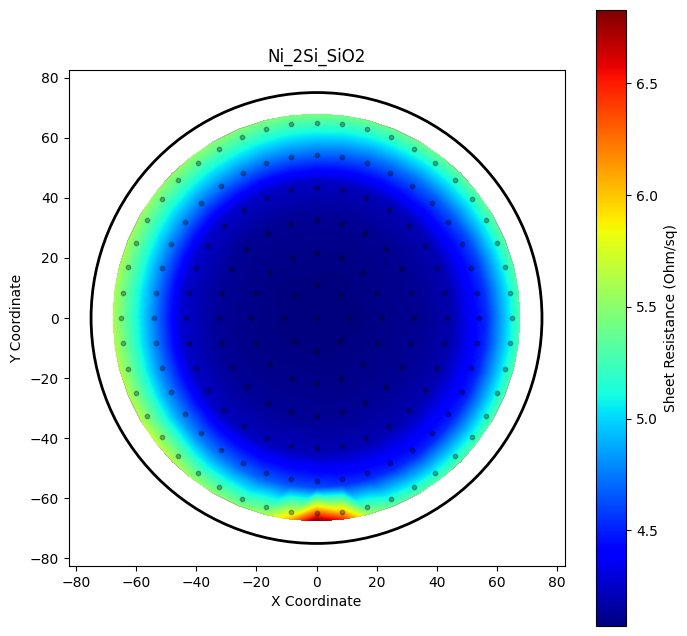

In [21]:
x = data["X Coordinate"].values
y = data["Y Coordinate"].values
z = data["Result (Ohm/sq)"].values

grid_x = np.linspace(x.min(), x.max(), 400)
grid_y = np.linspace(y.min(), y.max(), 400)
grid_x, grid_y = np.meshgrid(grid_x, grid_y)

dx = grid_x[0,1] - grid_x[0,0]
dy = grid_y[1,0] - grid_y[0,0]

# interpolate scattered points onto grid
grid_z = griddata((x, y), z, (grid_x, grid_y), method="linear")

wafer_radius = 75

fig, ax = plt.subplots(figsize=(8,8))
im = plt.imshow(grid_z,
                origin='lower',
                extent=[grid_x.min()- 3, grid_x.max()+ 3, grid_y.min()- 3, grid_y.max()+ 3],
                cmap="jet")
# im = plt.imshow(grid_z,
#                 origin='lower',
#                 extent=[x.min(), x.max(), y.min(), y.max()],
#                 cmap="jet")

cbar = plt.colorbar(im)
cbar.set_label("Sheet Resistance (Ohm/sq)")

# plot datapoints
ax.scatter(x, y, color='black', s=10, alpha=0.3)

circle = plt.Circle((0,0), wafer_radius,
                    edgecolor='black',
                    facecolor='none',
                    linewidth=2)

ax.add_patch(circle)

# Formatting
ax.set_aspect('equal')
ax.set_xlabel("X Coordinate")
ax.set_ylabel("Y Coordinate")
name = os.path.splitext(os.path.basename(file_path))[0]
ax.set_title(name)

# plt.savefig(f'../Images/4_point/{name}.pdf', dpi=500)
plt.show()


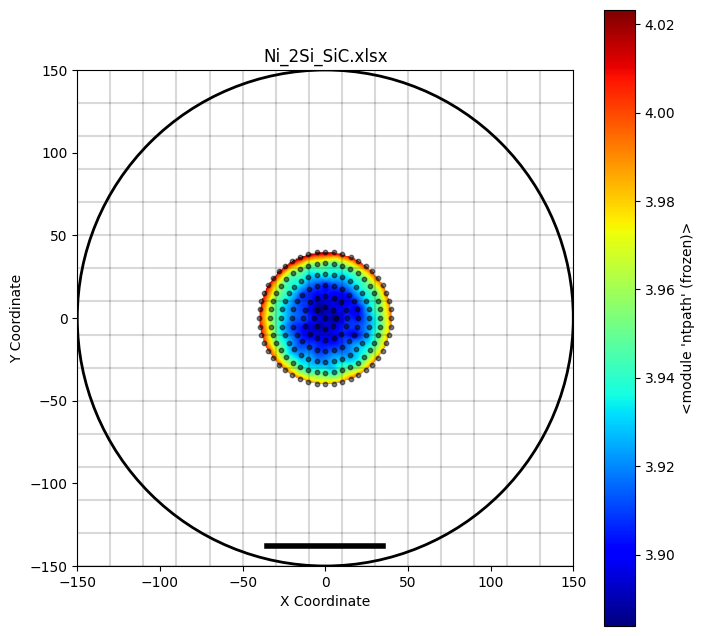

In [7]:
def plot_wafer_map(data,
                   x_col="X Coordinate",
                   y_col="Y Coordinate",
                   value_col="Result (Ohm/sq)",
                   wafer_radius=None,
                   die_size=None,
                   flat=True,
                   cmap="jet",
                   grid_resolution=400):    

# Extract arrays
    x = data[x_col].to_numpy()
    y = data[y_col].to_numpy()
    values = data[value_col].to_numpy()


    # Create interpolation grid
    xi = np.linspace(-wafer_radius, wafer_radius, grid_resolution)
    yi = np.linspace(-wafer_radius, wafer_radius, grid_resolution)
    Xi, Yi = np.meshgrid(xi, yi)

    Zi = griddata((x, y), values, (Xi, Yi), method='cubic')

    # Mask outside wafer
    mask = np.sqrt(Xi**2 + Yi**2) > wafer_radius
    Zi[mask] = np.nan

    # Create plot
    fig, ax = plt.subplots(figsize=(8,8))

    # Plot interpolated wafer map
    im = ax.imshow(Zi,
                   extent=(-wafer_radius, wafer_radius,
                           -wafer_radius, wafer_radius),
                   origin='lower',
                   cmap=cmap)

    # Add wafer boundary
    circle = Circle((0,0), wafer_radius,
                    edgecolor='black',
                    facecolor='none',
                    linewidth=2)
    ax.add_patch(circle)

    # Add wafer flat
    if flat:
        flat_size = 70

        y_flat = -wafer_radius * 0.92
        ax.plot([-flat_size/2, flat_size/2],
                [y_flat, y_flat],
                color="black",
                linewidth=4)

    # Add grid (die grid)
    if die_size is not None:
        grid_range = np.arange(-wafer_radius, wafer_radius, die_size)

        for gx in grid_range:
            ax.axvline(gx, color='black', alpha=0.15)

        for gy in grid_range:
            ax.axhline(gy, color='black', alpha=0.15)

    # Plot measurement points
    ax.scatter(x, y,
               color='black',
               s=10,
               alpha=0.5)

    # Formatting
    ax.set_aspect('equal')
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.set_title(os.path.basename(file_path))

    cbar = plt.colorbar(im)
    cbar.set_label(os.path)

    plt.show()


wafer_radius = 150
# Example usage with your dataframe:
plot_wafer_map(
    data,
    wafer_radius=wafer_radius,
    die_size=20,        # optional grid size
    flat=True
)
